In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv(r"D:\student dropout.csv")

print(df.shape)
df.head()

(649, 34)


,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,False


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School                       649 non-null    object
 1   Gender                       649 non-null    object
 2   Age                          649 non-null    int64 
 3   Address                      649 non-null    object
 4   Family_Size                  649 non-null    object
 5   Parental_Status              649 non-null    object
 6   Mother_Education             649 non-null    int64 
 7   Father_Education             649 non-null    int64 
 8   Mother_Job                   649 non-null    object
 9   Father_Job                   649 non-null    object
 10  Reason_for_Choosing_School   649 non-null    object
 11  Guardian                     649 non-null    object
 12  Travel_Time                  649 non-null    int64 
 13  Study_Time                   649 no

School                         0
Gender                         0
Age                            0
Address                        0
Family_Size                    0
Parental_Status                0
Mother_Education               0
Father_Education               0
Mother_Job                     0
Father_Job                     0
Reason_for_Choosing_School     0
Guardian                       0
Travel_Time                    0
Study_Time                     0
Number_of_Failures             0
School_Support                 0
Family_Support                 0
Extra_Paid_Class               0
Extra_Curricular_Activities    0
Attended_Nursery               0
Wants_Higher_Education         0
Internet_Access                0
In_Relationship                0
Family_Relationship            0
Free_Time                      0
Going_Out                      0
Weekend_Alcohol_Consumption    0
Weekday_Alcohol_Consumption    0
Health_Status                  0
Number_of_Absences             0
Grade_1   

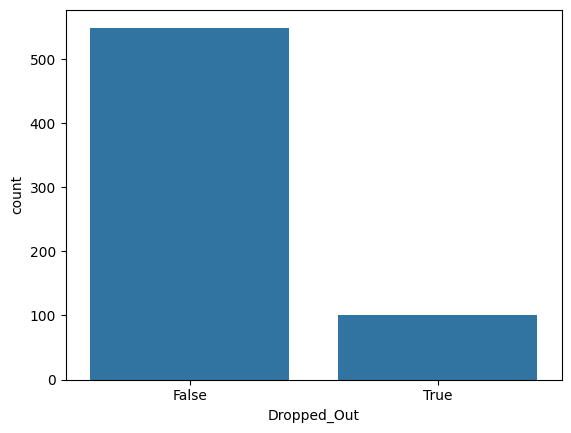

In [4]:
df['Dropped_Out'].value_counts()

sns.countplot(x='Dropped_Out', data=df)
plt.show()

In [5]:
df['Academic_Score'] = (df['Grade_1'] + df['Grade_2'] + df['Final_Grade']) / 3

df['Attendance_Risk'] = df['Number_of_Absences'].apply(lambda x: 1 if x > 10 else 0)

df['Alcohol_Risk'] = df['Weekend_Alcohol_Consumption'] + df['Weekday_Alcohol_Consumption']

df['Engagement_Score'] = df['Free_Time'] + df['Going_Out']

df['Family_Support_Index'] = df['Mother_Education'] + df['Father_Education']

df['Performance_Gap'] = df['Final_Grade'] - df['Grade_1']

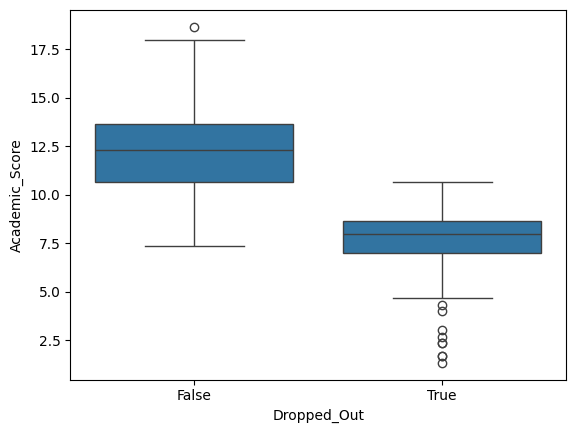

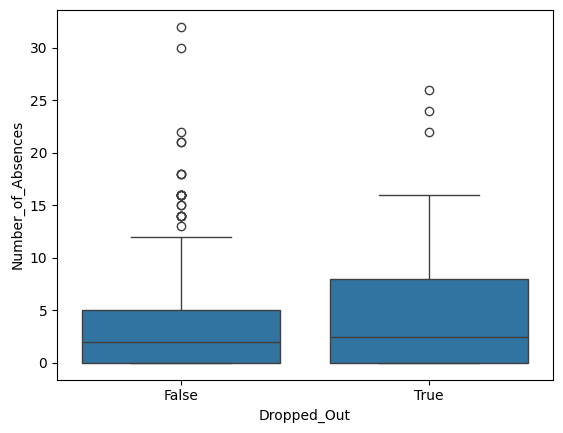

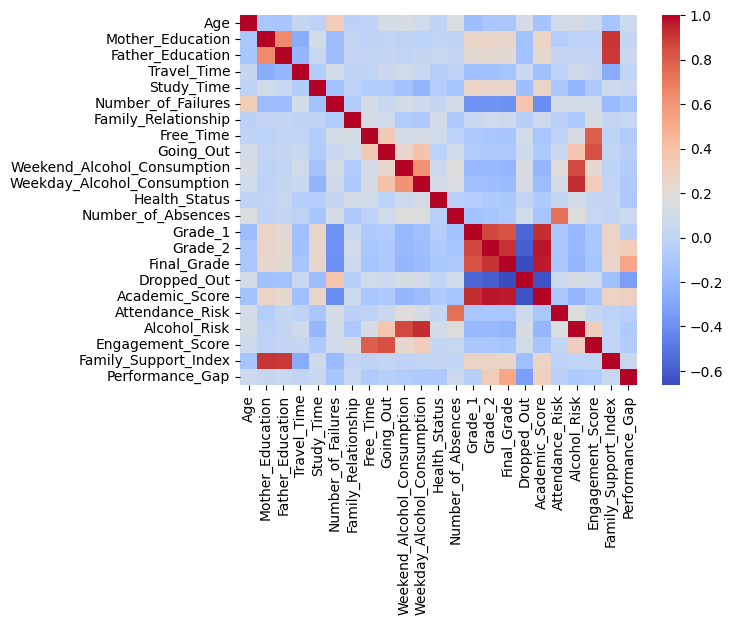

In [6]:
sns.boxplot(x='Dropped_Out', y='Academic_Score', data=df)
plt.show()

sns.boxplot(x='Dropped_Out', y='Number_of_Absences', data=df)
plt.show()

sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.show()

In [7]:
cat_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [8]:
X = df.drop('Dropped_Out', axis=1)
y = df['Dropped_Out'].astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9769230769230769
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       110
           1       0.95      0.90      0.92        20

    accuracy                           0.98       130
   macro avg       0.96      0.95      0.95       130
weighted avg       0.98      0.98      0.98       130



In [10]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        20

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130



In [11]:
cv_scores = cross_val_score(rf, X_scaled, y, cv=5)
print("Cross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


                        Feature  Importance
32                  Final_Grade    0.407180
33               Academic_Score    0.183149
31                      Grade_2    0.136258
30                      Grade_1    0.099153
38              Performance_Gap    0.030579
14           Number_of_Failures    0.025844
0                        School    0.011118
20       Wants_Higher_Education    0.010450
36             Engagement_Score    0.006437
35                 Alcohol_Risk    0.006086
29           Number_of_Absences    0.005965
27  Weekday_Alcohol_Consumption    0.005622
23          Family_Relationship    0.005466
37         Family_Support_Index    0.005135
2                           Age    0.005040


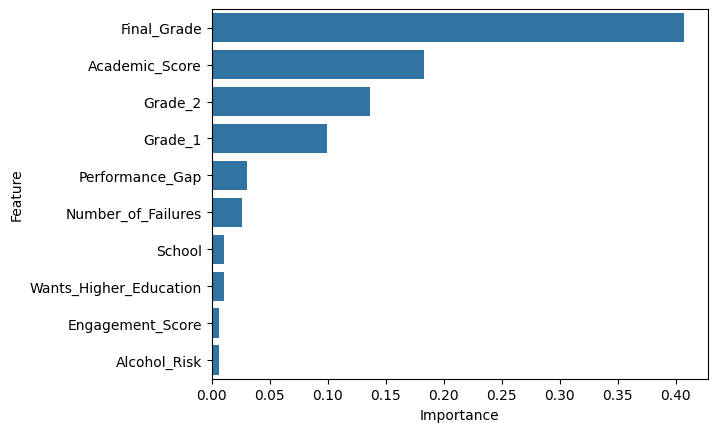

In [12]:
importances = rf.feature_importances_
features = X.columns

feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp.head(15))

sns.barplot(x='Importance', y='Feature', data=feat_imp.head(10))
plt.show()

In [13]:
df['Dropout_Probability'] = rf.predict_proba(X_scaled)[:,1]

def risk_label(p):
    if p < 0.3:
        return "Low Risk"
    elif p < 0.6:
        return "Medium Risk"
    else:
        return "High Risk"

df['Risk_Level'] = df['Dropout_Probability'].apply(risk_label)

df[['Dropout_Probability','Risk_Level']].head()

,Dropout_Probability,Risk_Level
0,0.075,Low Risk
1,0.015,Low Risk
2,0.000,Low Risk
3,0.000,Low Risk
4,0.000,Low Risk


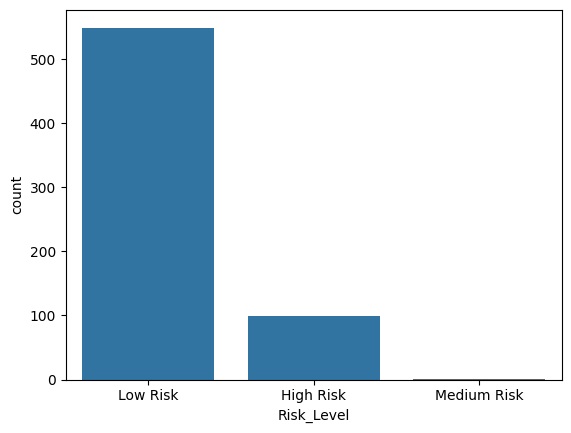

In [14]:
sns.countplot(x='Risk_Level', data=df)
plt.show()